### Image Preprocessing

Here examples of image preprocessing used in model are presented. At first image is read and its color space converted from BGR to HSV. Then we take only S channel (saturation) and thus getting a gray scale image. The contours of the roadway are clearly visible in S channel. An idea to use S channel in this project was taken from [Mengxi Wu's article](https://medium.com/@xslittlegrass/self-driving-car-in-a-simulator-with-a-tiny-neural-network-13d33b871234).

In [1]:
import pandas as pd

data = pd.read_csv("data_augmented.csv").to_dict(orient='list')

(160, 320)


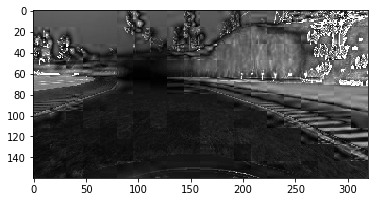

In [2]:
import cv2
import matplotlib.pyplot as plt

# visualizations will be shown in the notebook
%matplotlib inline

image = cv2.cvtColor(cv2.imread(data['CENTER_IMAGE'][0]), cv2.COLOR_BGR2HSV)[:,:,1]
plt.imshow(image, cmap='gray')
print(image.shape)

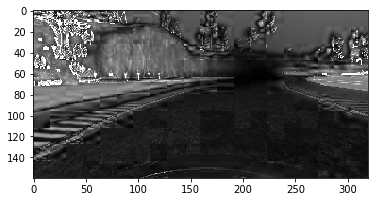

In [3]:
image = cv2.flip(image, flipCode=1)
plt.imshow(image, cmap='gray')

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 70, 320, 1)    0           cropping2d_input_1[0][0]         
Total params: 0
Trainable params: 0
Non-trainable params: 0
____________________________________________________________________________________________________


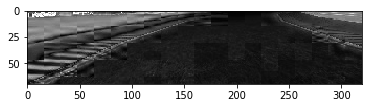

In [4]:
import numpy as np

from keras.models import Sequential
from keras.layers.convolutional import Cropping2D

img_arr = np.reshape(image, image.shape + (1,))

model = Sequential()
model.add(Cropping2D(cropping=((65, 25), (0, 0)), input_shape=img_arr.shape))
model.compile(loss='mse', optimizer='adam')

model.summary()

img_arr_cropped = model.predict(np.array([img_arr]), batch_size=1)

image = np.reshape(img_arr_cropped, img_arr_cropped.shape[1:3])

plt.imshow(image, cmap='gray')